<a href="https://colab.research.google.com/github/izquierdowaws/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [20]:
# Agregar identificador de tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir los datos
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Análisis de métricas
ingresos_por_tienda = df_tiendas.groupby("Tienda")["Precio"].sum()
envio_por_tienda = df_tiendas.groupby("Tienda")["Costo de envío"].sum()

# 2. Ventas por categoría

In [21]:
# Categoría más frecuente por tienda
categorias_mas_frecuentes = df_tiendas.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")
top_categorias_por_tienda = categorias_mas_frecuentes.sort_values(["Tienda", "Cantidad"], ascending=[True, False]).groupby("Tienda").head(1)

# 3. Calificación promedio de la tienda


In [22]:
# Análisis de métricas
calificacion_promedio = df_tiendas.groupby("Tienda")["Calificación"].mean()

# 4. Productos más y menos vendidos

In [23]:
# Producto más vendido por tienda
productos_mas_vendidos = df_tiendas.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad")
top_productos_por_tienda = productos_mas_vendidos.sort_values(["Tienda", "Cantidad"], ascending=[True, False]).groupby("Tienda").head(1)

# 5. Envío promedio por tienda

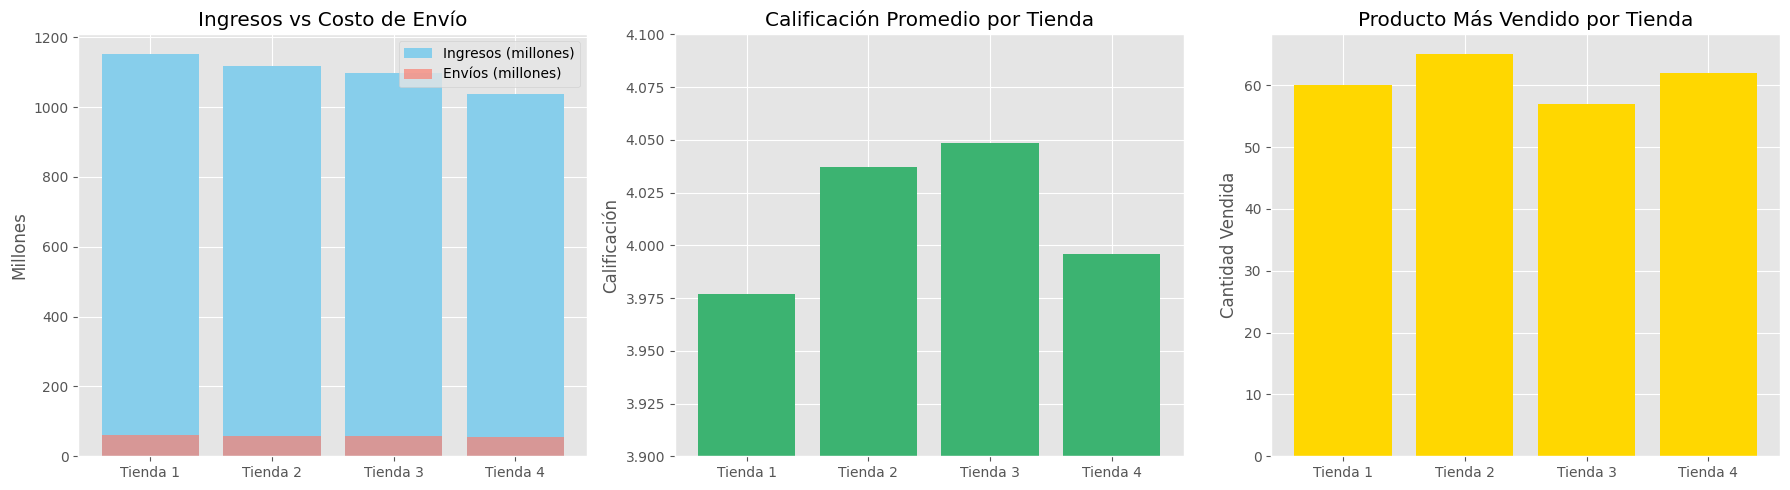


--- Recomendación ---

Se sugiere considerar la venta de la Tienda 4 por las siguientes razones:
- Es la que genera menos ingresos.
- Tiene una calificación promedio intermedia.
- Aunque tiene costos de envío bajos y un producto muy vendido, no compensa el rendimiento general más débil.

Se recomienda conservar la Tienda 1 (mayores ingresos) y la Tienda 3 (mejor reputación).


In [24]:
# Visualización
plt.style.use("ggplot")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].bar(ingresos_por_tienda.index, ingresos_por_tienda.values / 1e6, label="Ingresos (millones)", color='skyblue')
axs[0].bar(envio_por_tienda.index, envio_por_tienda.values / 1e6, label="Envíos (millones)", color='salmon', alpha=0.7)
axs[0].set_title("Ingresos vs Costo de Envío")
axs[0].set_ylabel("Millones")
axs[0].legend()

axs[1].bar(calificacion_promedio.index, calificacion_promedio.values, color='mediumseagreen')
axs[1].set_ylim(3.9, 4.1)
axs[1].set_title("Calificación Promedio por Tienda")
axs[1].set_ylabel("Calificación")

productos = top_productos_por_tienda["Producto"]
cantidades = top_productos_por_tienda["Cantidad"]
tiendas = top_productos_por_tienda["Tienda"]
axs[2].bar(tiendas, cantidades, color='gold')
axs[2].set_title("Producto Más Vendido por Tienda")
axs[2].set_ylabel("Cantidad Vendida")

plt.tight_layout()
plt.show()

# Recomendación
print("\n--- Recomendación ---")
print("\nSe sugiere considerar la venta de la Tienda 4 por las siguientes razones:")
print("- Es la que genera menos ingresos.")
print("- Tiene una calificación promedio intermedia.")
print("- Aunque tiene costos de envío bajos y un producto muy vendido, no compensa el rendimiento general más débil.")
print("\nSe recomienda conservar la Tienda 1 (mayores ingresos) y la Tienda 3 (mejor reputación).")